# Clustering Sprint Challenge

Objectives:
* Describe two clustering algorithms
* Create k clusters with k-Means algorithm
* Compare/contrast the performance of your two algorithms with two datasets

### 1. Describe two different clustering algorithms

There are many clustering algorithms with profoundly different implementations. Their objective is the same - to identify groups in unlabeled data.

Fill out the below python objects.

In [0]:
# Clustering algorithm 1:

algorithm_one_name = "K-Means"
algorithm_one_description = """Centroids corresponding to the number of desired clusters are chosen at random.
                               Points in the dataset are assigned to clusters depending on which centroid each point is closest to
                               Centroids are recalculated within each clusters and all points are reassigned again.
                               Procedure is repeated until the centroid location isn't changing."""

# Clustering algorithm 2:

algorithm_two_name = "Density-Based Spatial Clustering of Applications with Noise (DBSCAN)"
algorithm_two_description = """ A starting point is chosen at random and its neighborhood of radius epsilon is determined using the distance formula.
                                If the number of points in the neighborhood is sufficient, the randomly chosen point becomes a part of the first cluster.
                                Otherwise it is labeled as noise. Neighborhoods are then determined for all the points in the cluster
                                and the procedure repeats starting with a new unvisited point."""

### 2. Create k clusters with k-Means algorithm

In [0]:
# Import libraries
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

# Dataset
set1 = pd.read_csv('https://www.dropbox.com/s/zakq7e0r8n1tob9/clustering_set1.csv?raw=1')

# Create kmeans object
# Write a function that returns the centroid that is nearest to it

def cent(p, k0):
  c = 0
  dist = np.linalg.norm(p-k0[0])
  for i in range(1, len(k0)):
    if np.linalg.norm(p-k0[i])<dist:
      c = i
      dist = np.linalg.norm(p-k0[i])
  return c

# Write a function that uses the above function, computing which centroid is 
# nearest to _every_ point

def sort_pts(pts, k0):
  clusters = [[] for i in range(len(k0))]
  for p in pts:
    c = cent(p, k0)
    clusters[c].append(p);
  return clusters

# Recalculate the centroids for each cluster based on the points that were added
# to it.

def recalc(clusters):
  k2 = [[] for i in range(len(clusters))]
  for c in range(len(clusters)):
    s = [sum(p) for p in zip(*clusters[c])]
    l = len(clusters[c])
    k2[c] = [s[i]/l for i in range(len(s))]
  return k2


[array([0.06929242, 4.24065214]), array([-1.62769192,  4.4867731 ])]


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


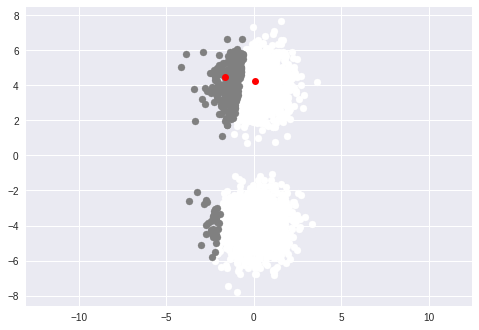

[[0.2229729426353543, -0.4286767297997011], [-1.4916479165873844, 3.361795832969497]]


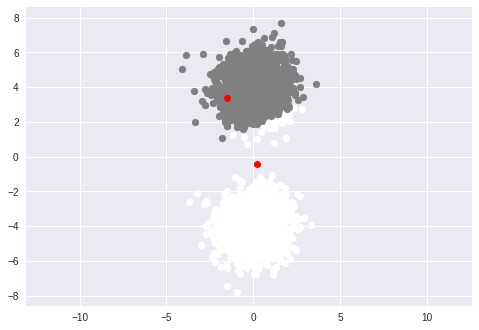

[[0.05893669155520422, -3.8882383076113523], [0.006349525896376911, 4.044359936611098]]


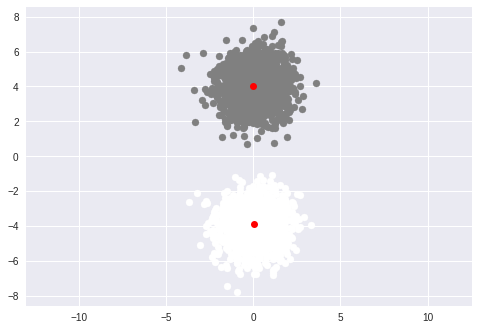

[[0.03429001199090932, -4.015029726650497], [0.03215312310516602, 3.9966341942773482]]


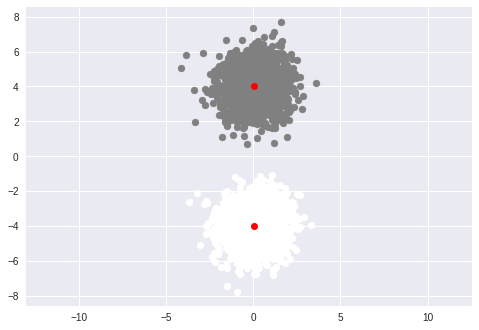

Clusters found after  2  iterations


In [0]:

# Fit kmeans object to data

points = set1[['x','y']].values

# Run the above functions max_iter times and plot the result
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

k = 2
k0 = [random.choice(points) for i in range(k)]

colors = ['white', 'gray', 'black']

for i in range(100):
  clusters = sort_pts(points, k0)
  print(k0)
  iter = i
  for j in range(len(k0)):
    plt.scatter([clusters[j][i][0] for i in range(len(clusters[j]))], [clusters[j][i][1] for i in range(len(clusters[j]))], marker = 'o', color = colors[j])
  plt.plot([k0[i][0] for i in range(len(k0))], [k0[i][1] for i in range(len(k0))], 'or');
  plt.axes().set_aspect('equal', 'datalim');
  plt.show()
  k2 = k0[:]
  k0 = recalc(clusters)
  if set(map(tuple,k2)) == set(map(tuple,k0)):
    print('Clusters found after ', iter-1, ' iterations')
    break


### 3. Compare/contrast the performance of your two algorithms with two datasets

In [0]:
# Second dataset
set2 = pd.read_csv('https://www.dropbox.com/s/zakq7e0r8n1tob9/clustering_set2.csv?raw=1')
points2 = set2[['x','y']].values
set2.head()

,Unnamed: 0,x,y
0,0,0.649105,-3.072988
1,1,-0.257974,-4.430689
2,2,0.054035,-4.404372
3,3,-0.036780,-2.815223
4,4,0.319785,-4.395542


KMeans
DBSCAN
KMeans
DBSCAN


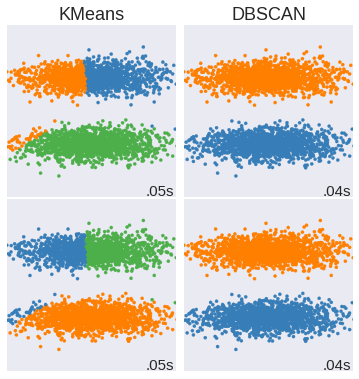

In [0]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(8)

n_samples = 1500

plt.figure(figsize=(5,5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3}

datasets = [points, points2]

for i_dataset, (dataset) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()

    X = dataset
  
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============    
    two_means = cluster.KMeans(n_clusters=params['n_clusters'])
    
    dbscan = cluster.DBSCAN(eps=params['eps'])
    clustering_algorithms = (('KMeans', two_means),('DBSCAN', dbscan))

    for name, algorithm in clustering_algorithms:
        t0 = time.time()
        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()